In [1]:
import osmnx as ox
import networkx as nx
import numpy as np

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

<class 'networkx.classes.multidigraph.MultiDiGraph'>


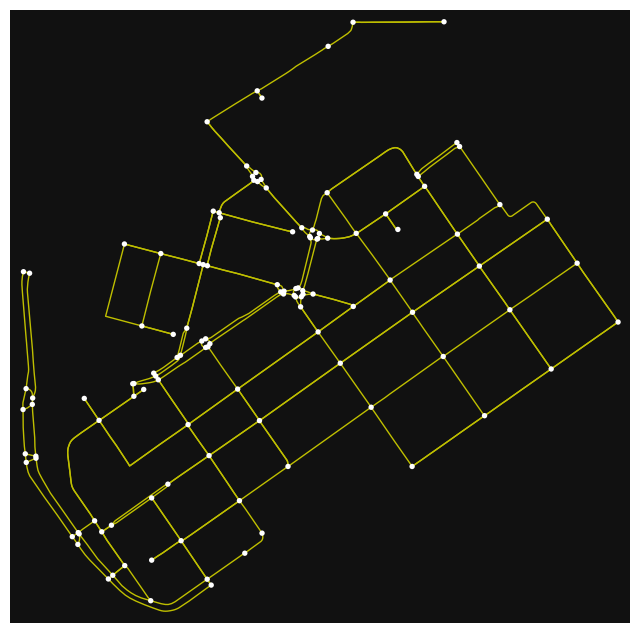

In [2]:
place = 'Kamppi, Helsinki, Finland'
graph_ox = ox.graph_from_place(place,network_type='drive')

print(type(graph_ox))
fig, ax = ox.plot_graph(graph_ox,edge_color='y')

In [3]:
graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))
graph.nodes()
graph.edges(data=True)



hf.fill_maxspeed(graph)

living_street is set to 30
living_street is set to 30
residential is set to 30
residential is set to 30
living_street is set to 30
living_street is set to 30


In [4]:
graph.edges(data=True)
times = {e: graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"] for e in graph.edges()}
capacities = {e: 1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000 for e in graph.edges()}
nx.set_edge_attributes(graph, times,"c")
nx.set_edge_attributes(graph, capacities,"cap")

array([[<AxesSubplot: title={'center': 'cap'}>]], dtype=object)

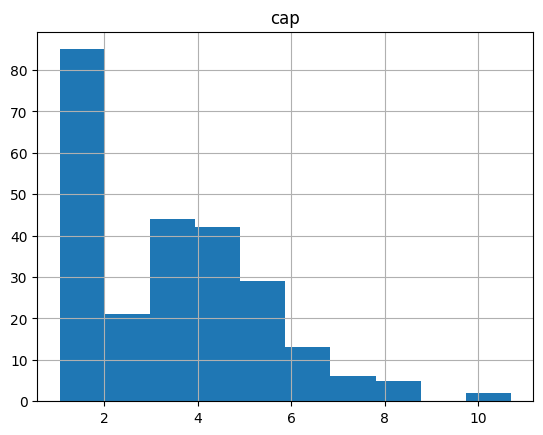

In [5]:
graph.edges(data=True)
df = nx.to_pandas_edgelist(graph, nodelist=graph.nodes())
df[["cap"]].hist(bins=10)

In [6]:
graph.nodes(data=True)
# df = nx.to_pandas_nodelist(graph, nodelist=graph.nodes())
# df[["cap"]].hist(bins=10)
# df

NodeDataView({0: {'y': 60.1647939, 'x': 24.9210566, 'street_count': 4}, 1: {'y': 60.1636645, 'x': 24.9210282, 'street_count': 4}, 2: {'y': 60.164631, 'x': 24.9212859, 'street_count': 3}, 3: {'y': 60.1643255, 'x': 24.9370233, 'street_count': 4}, 4: {'y': 60.1659479, 'x': 24.9416738, 'street_count': 4}, 5: {'y': 60.1651348, 'x': 24.939344, 'highway': 'traffic_signals', 'street_count': 4}, 6: {'y': 60.1653511, 'x': 24.9355842, 'street_count': 4}, 7: {'y': 60.1634458, 'x': 24.9345002, 'street_count': 4}, 8: {'y': 60.1711426, 'x': 24.9324437, 'street_count': 4}, 9: {'y': 60.1694182, 'x': 24.9273621, 'street_count': 3}, 10: {'y': 60.1707248, 'x': 24.9315761, 'street_count': 3}, 11: {'y': 60.1664916, 'x': 24.9306919, 'street_count': 4}, 12: {'y': 60.1669427, 'x': 24.9272265, 'highway': 'traffic_signals', 'street_count': 3}, 13: {'y': 60.1641708, 'x': 24.9266982, 'street_count': 4}, 14: {'y': 60.1657346, 'x': 24.9261818, 'street_count': 1}, 15: {'y': 60.1636339, 'x': 24.9274293, 'street_count'

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 2. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

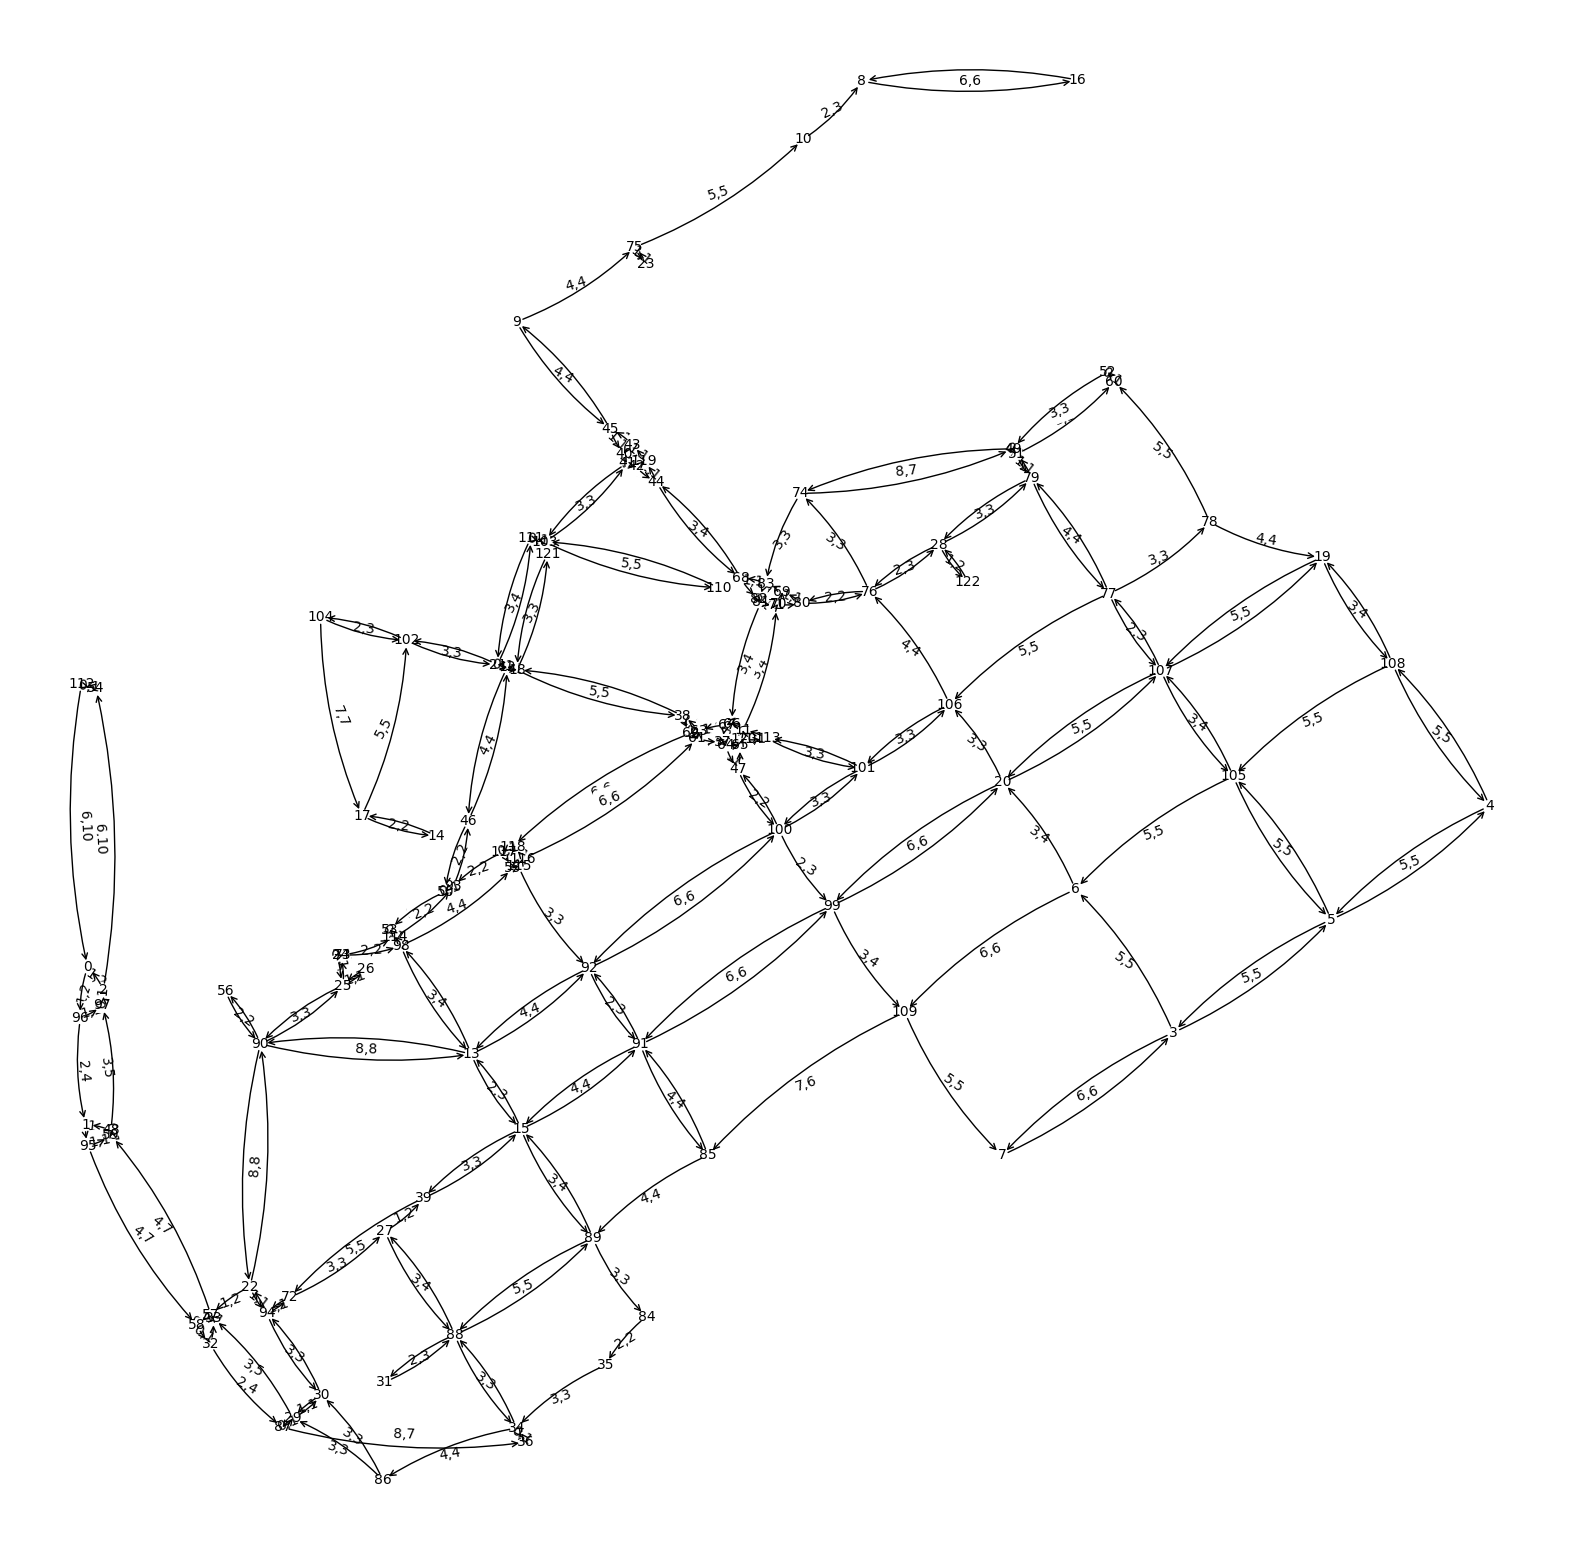

In [7]:
# obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
obj,constraints,vp = hf.init_from_graph(graph,[(15,91,5)])

hf.plot_multigraph(graph, with_labels=True, font_size=10)

In [11]:
from networkx.drawing.nx_agraph import write_dot
write_dot(graph,'multi.dot')

In [15]:
# nx.write_latex(graph,"latex_graph.txt")
from network2tikz import plot
plot(graph,'mypdf.pdf')

500
250
250
166
166
conservation of flow constraint couldn't be satisfied at LD - infeasible
166
166
125
125
125
125
conservation of flow constraint couldn't be satisfied at LD - infeasible
125
125
100
100
100
100
100
100
100
0 / 0: optimal z: 40.0 zLD: (24.0) cap_ok = False (3, 0, 0, 1) 
	1 / 1: optimal z: 40.0 zLD: (24.0) cap_ok = False (229, 0, 0, 1) 
		3 / 3: optimal z: 20.0 zLD: (24.0) cap_ok = False (49, 0, 0, 1) 
			7 / 7: optimal z: 20.0 zLD: (24.0) cap_ok = False (173, 0, 0, 1) 
				13 / 13: optimal z: 20.0 zLD: (24.0) cap_ok = False (25, 0, 0, 1) 
					23: not available
					24: not available
				14 / 14: optimal z: 47.0 zLD: (51.0) cap_ok = False (172, 0, 0, 1) 
					25: not available
					26: not available
			8 / 8: optimal z: 36.0 zLD: (40.0) cap_ok = False (172, 0, 0, 1) 
				15 / 15: optimal z: 36.0 zLD: (40.0) cap_ok = False (25, 0, 0, 1) 
					27: not available
					28: not available
				16 / 16: optimal FEASIBLE for I OPTIMAL for I z: 48.0 zLD: (48.0) cap_ok = True
		

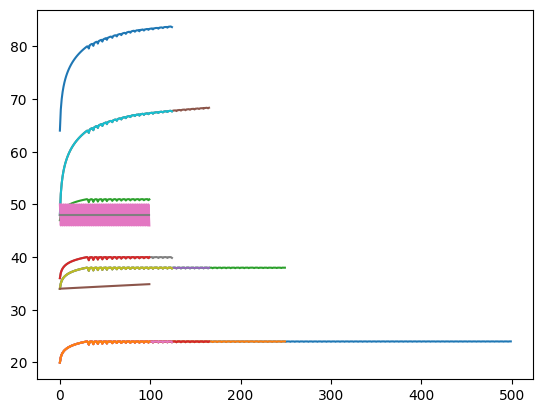

In [19]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=20,INIT_NUM_STEPS=500)

39 7.275957614183426e-12
20.0 3225.0 None


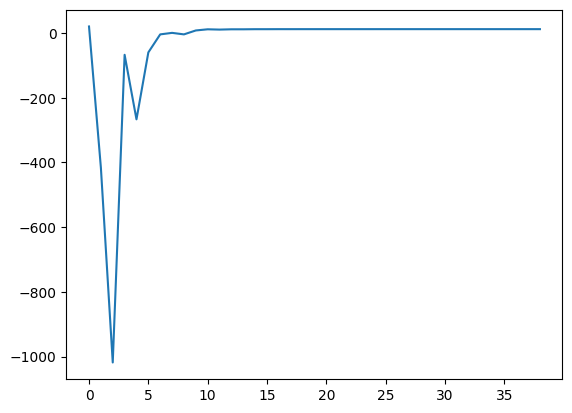

In [21]:
LB, UB, X_best = hf.run2(obj,constraints,vp,MAX_ITER=1000)
print(LB,UB,X_best)

In [25]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)

k	COLOR
0 	 b


AttributeError: module 'networkx' has no attribute 'write_dot'